In [3]:
import pandas as pd
df=pd.read_csv("air_filter_data.csv")
df.head()

,timestamp,filter_name,location,filter_class,filter_age_days,load_factor,pressure_drop_pa,efficiency,inlet_pm25,outlet_pm25,inlet_pm10,outlet_pm10,replacement_needed,hour
0,2022-08-28 03:00:00,Electrostatic_Filter_Mall,Shopping Mall,Electrostatic,23.54,0.408784,60.7,0.870,47.7,6.2,88.3,11.4,0,3
1,2023-06-08 17:00:00,HEPA_Filter_Hospital,Hospital Ventilation,HEPA,5.46,0.309243,95.0,0.981,71.3,1.4,75.8,2.0,0,17
2,2022-09-14 05:00:00,HEPA_Filter_Hospital,Hospital Ventilation,HEPA,23.50,0.312394,114.9,0.962,67.4,2.6,98.9,3.8,0,5
3,2021-01-16 09:00:00,Electrostatic_Filter_Mall,Shopping Mall,Electrostatic,4.04,0.420890,25.1,0.893,69.2,7.4,57.8,6.2,0,9
4,2021-06-01 14:00:00,HEPA_Filter_Hospital,Hospital Ventilation,HEPA,1.88,0.200000,83.7,0.992,45.3,1.0,66.4,2.0,0,14


In [5]:
print(df.isnull().sum())

timestamp             0
filter_name           0
location              0
filter_class          0
filter_age_days       0
load_factor           0
pressure_drop_pa      0
efficiency            0
inlet_pm25            0
outlet_pm25           0
inlet_pm10            0
outlet_pm10           0
replacement_needed    0
hour                  0
dtype: int64


In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21915 entries, 0 to 21914
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           21915 non-null  datetime64[ns]
 1   filter_name         21915 non-null  object        
 2   location            21915 non-null  object        
 3   filter_class        21915 non-null  object        
 4   filter_age_days     21915 non-null  float64       
 5   load_factor         21915 non-null  float64       
 6   pressure_drop_pa    21915 non-null  float64       
 7   efficiency          21915 non-null  float64       
 8   inlet_pm25          21915 non-null  float64       
 9   outlet_pm25         21915 non-null  float64       
 10  inlet_pm10          21915 non-null  float64       
 11  outlet_pm10         21915 non-null  float64       
 12  replacement_needed  21915 non-null  int64         
 13  hour                21915 non-null  int64     

In [7]:
print(df.drop_duplicates(inplace=True))

None


KeyError: "None of [Index([(60.7, 95.0, 114.9, 25.1, 83.7, 10.0, 34.5, 133.1, 28.3, 147.6, 125.0, 41.3, 135.5, 95.1, 116.7, 27.1, 16.3, 22.6, 134.8, 28.9, 117.7, 105.5, 64.1, 110.6, 12.3, 153.0, 112.4, 17.7, 103.7, 111.5, 78.4, 19.4, 21.0, 59.9, 105.5, 74.9, 108.5, 74.9, 109.7, 66.0, 108.2, 99.7, 21.7, 22.5, 114.2, 121.6, 72.5, 92.0, 88.4, 79.9, 100.0, 91.4, 72.3, 68.4, 118.0, 36.6, 153.0, 116.3, 116.0, 88.0, 33.7, 27.8, 116.1, 121.6, 39.0, 113.7, 95.4, 88.8, 12.9, 86.8, 118.5, 111.1, 59.8, 67.3, 108.3, 35.4, 115.0, 117.1, 115.4, 17.7, 134.7, 132.9, 56.2, 49.6, 56.2, 97.1, 28.1, 153.8, 153.8, 63.2, 42.4, 88.8, 35.2, 16.3, 54.4, 10.9, 135.7, 119.7, 132.2, 88.0, ...)], dtype='object')] are in the [columns]"

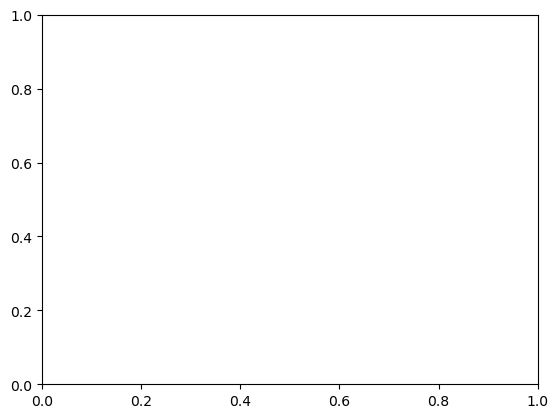

In [9]:
import seaborn as sns
df.boxplot(df["pressure_drop_pa"])

In [ ]:
df['filter_class'] = df['filter_class'].str.strip().str.lower()


In [ ]:
df['filter_age_category'] = pd.cut(df['filter_age_days'], bins=[0,10,30,100], labels=['New', 'Mid', 'Old'])


In [ ]:
print(df.info())  
print(df.head())  


In [ ]:
print(df.describe())     


In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".3f")
plt.title("Correlation Matrix")
plt.show()

ValueError: could not convert string to float: '2022-08-28 03:00:00'

<Figure size 1000x600 with 0 Axes>

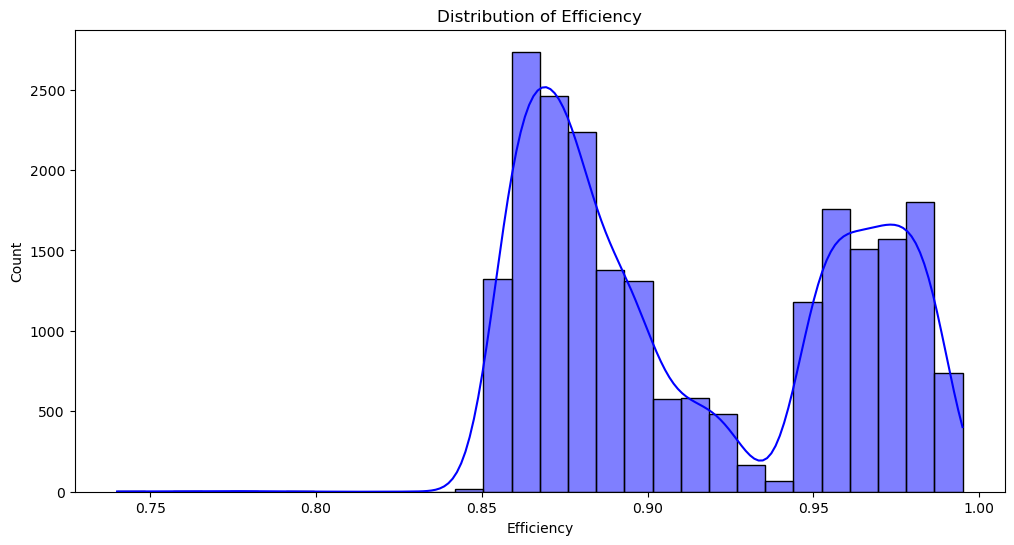

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(df['efficiency'], bins=30, kde=True, color='blue')
plt.title("Distribution of Efficiency")
plt.xlabel("Efficiency")
plt.ylabel("Count")
plt.show()


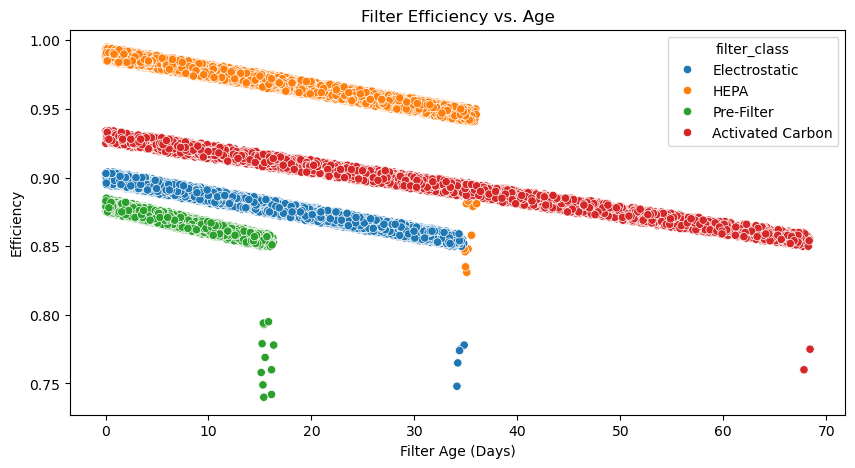

In [16]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['filter_age_days'], y=df['efficiency'], hue=df['filter_class'])
plt.title("Filter Efficiency vs. Age")
plt.xlabel("Filter Age (Days)")
plt.ylabel("Efficiency")
plt.show()


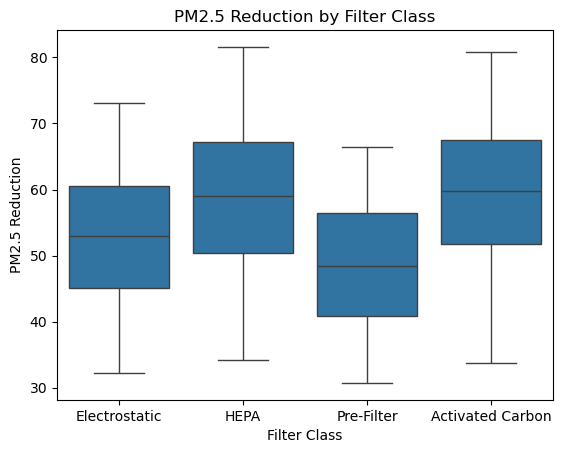

In [18]:
df['pm25_reduction'] = df['inlet_pm25'] - df['outlet_pm25']
sns.boxplot(x=df['filter_class'], y=df['pm25_reduction'])
plt.title("PM2.5 Reduction by Filter Class")
plt.xlabel("Filter Class")
plt.ylabel("PM2.5 Reduction")
plt.show()


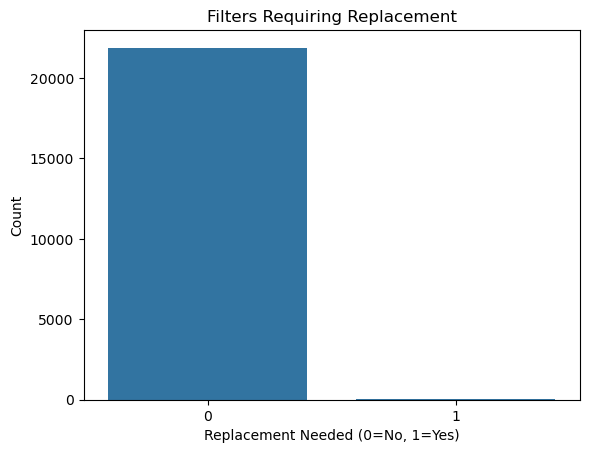

In [20]:
sns.countplot(x=df['replacement_needed'])
plt.title("Filters Requiring Replacement")
plt.xlabel("Replacement Needed (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()


C:\Users\kapil\AppData\Local\Temp\ipykernel_7820\281002857.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('timestamp').resample('M')['pressure_drop_pa'].mean().plot(figsize=(12,5))


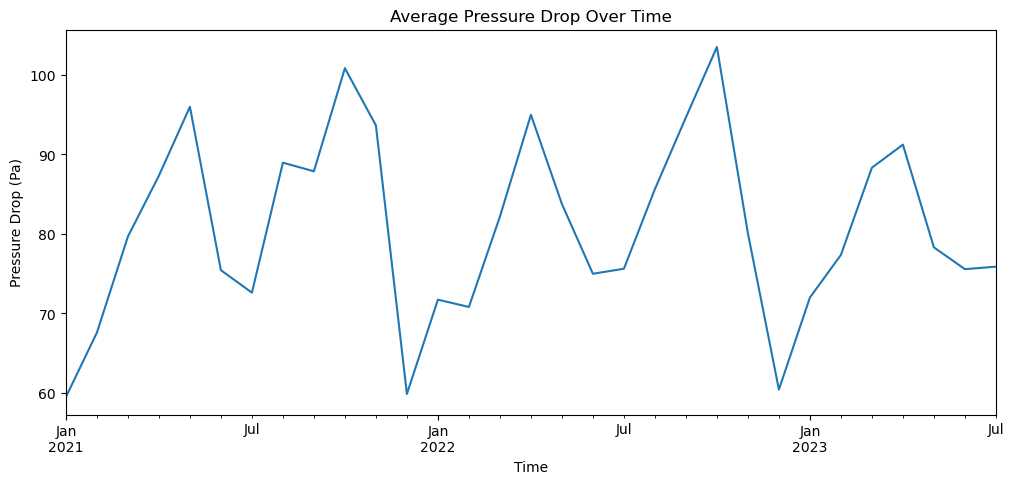

In [22]:
df['timestamp'] = pd.to_datetime(df['timestamp']) 
df.set_index('timestamp').resample('M')['pressure_drop_pa'].mean().plot(figsize=(12,5))
plt.title("Average Pressure Drop Over Time")
plt.xlabel("Time")
plt.ylabel("Pressure Drop (Pa)")
plt.show()